In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ARIMA_Merged_LogReturns_Final.csv to ARIMA_Merged_LogReturns_Final.csv
Saving LSTM_Merged_LogReturns_Final.csv to LSTM_Merged_LogReturns_Final.csv
Saving Mamba_Merged_LogReturns_Final.csv to Mamba_Merged_LogReturns_Final.csv


In [ ]:
import pandas as pd
import re

In [ ]:
# Function to check and fix date format
def fix_date_format(df):
    sample_dates = df["Date"].dropna().astype(str).head(5)
    pattern = re.compile(r"^\d{4}-\d{2}-\d{2}$")

    if all(pattern.match(str(d)) for d in sample_dates):
        print("✅ Date format already correct.")
    else:
        print("⚠ Fixing date format...")
        df["Date"] = pd.to_datetime(df["Date"], errors="coerce").dt.strftime("%Y-%m-%d")
    return df

In [ ]:
# ✅ File paths (Update if needed)
arima_file = "/content/ARIMA_Merged_LogReturns_Final.csv"
lstm_file = "/content/LSTM_Merged_LogReturns_Final.csv"
mamba_file = "/content/Mamba_Merged_LogReturns_Final.csv"


In [ ]:
# Load data
arima_df = pd.read_csv(arima_file)
lstm_df = pd.read_csv(lstm_file)
mamba_df = pd.read_csv(mamba_file)


In [ ]:
# ✅ Align on common range
start_date = max(arima_df["Date"].min(), lstm_df["Date"].min(), mamba_df["Date"].min())
end_date = min(arima_df["Date"].max(), lstm_df["Date"].max(), mamba_df["Date"].max())

In [ ]:
# ✅ Align on common range
arima_df = arima_df[(arima_df["Date"] >= start_date) & (arima_df["Date"] <= end_date)]
lstm_df = lstm_df[(lstm_df["Date"] >= start_date) & (lstm_df["Date"] <= end_date)]
mamba_df = mamba_df[(mamba_df["Date"] >= start_date) & (mamba_df["Date"] <= end_date)]

# ✅ Sort by Date
arima_df.sort_values(by="Date", inplace=True)
lstm_df.sort_values(by="Date", inplace=True)
mamba_df.sort_values(by="Date", inplace=True)

/tmp/ipython-input-10-2207313757.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arima_df.sort_values(by="Date", inplace=True)
/tmp/ipython-input-10-2207313757.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mamba_df.sort_values(by="Date", inplace=True)


In [ ]:
# ✅ Standard stock order
stock_order = ["Apple", "Amazon", "Meta", "Google", "Costco", "Microsoft", "Netflix", "Starbucks", "Tesla", "Amgen"]

In [ ]:
# ✅ Rename and reorder columns
def reorder_columns(df, model_name):
    mapping = {}
    for col in df.columns:
        if col != "Date":
            for stock in stock_order:
                if stock.lower() in col.lower():
                    mapping[col] = f"{stock}_{model_name}_LogReturns"
                    break
    return df.rename(columns=mapping)[["Date"] + list(mapping.values())]

In [ ]:
arima_df = reorder_columns(arima_df, "ARIMA")
lstm_df = reorder_columns(lstm_df, "LSTM")
mamba_df = reorder_columns(mamba_df, "Mamba")

In [ ]:
arima_df = arima_df.drop_duplicates(subset="Date")
lstm_df = lstm_df.drop_duplicates(subset="Date")
mamba_df = mamba_df.drop_duplicates(subset="Date")

# ✅ Merge into master DataFrame
master_df = arima_df.merge(lstm_df, on="Date", how="inner").merge(mamba_df, on="Date", how="inner")
master_df.sort_values(by="Date", inplace=True)
master_df.reset_index(drop=True, inplace=True)


In [ ]:
print("✅ First 5 rows:")
print(master_df.head())
print("\n✅ Last 5 rows:")
print(master_df.tail())


✅ First 5 rows:
         Date  Tesla_ARIMA_LogReturns  Starbucks_ARIMA_LogReturns  \
0  2023-01-04                0.006468                   -0.001965   
1  2023-01-05               -0.005236                   -0.001753   
2  2023-01-06               -0.000097                   -0.002190   
3  2023-01-09               -0.003492                   -0.004392   
4  2023-01-10               -0.005349                    0.000223   

   Netflix_ARIMA_LogReturns  Microsoft_ARIMA_LogReturns  \
0                  0.001621                   -0.001651   
1                 -0.000532                    0.001721   
2                  0.001828                    0.003402   
3                  0.000523                    0.005785   
4                 -0.001197                    0.001893   

   Meta_ARIMA_LogReturns  Google_ARIMA_LogReturns  Costco_ARIMA_LogReturns  \
0              -0.001856                -0.000311                 0.000184   
1              -0.001646                 0.000323         

In [ ]:
print(master_df.index.min(), master_df.index.max())

0 500


In [ ]:
# ✅ Save to Google Drive
output_path = "/content/drive/MyDrive/Master_LogReturns_AllModels.csv"
master_df.to_csv(output_path, index=False)
print(f"\n✅ Master file saved at: {output_path}")


✅ Master file saved at: /content/drive/MyDrive/Master_LogReturns_AllModels.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# Load from Google Drive
master_file_path = "/content/drive/MyDrive/Master_LogReturns_AllModels.csv"
master_df = pd.read_csv(master_file_path)

print("✅ Loaded Master File:")
print(master_df.head())

✅ Loaded Master File:
         Date  Tesla_ARIMA_LogReturns  Starbucks_ARIMA_LogReturns  \
0  2023-01-04                0.006468                   -0.001965   
1  2023-01-05               -0.005236                   -0.001753   
2  2023-01-06               -0.000097                   -0.002190   
3  2023-01-09               -0.003492                   -0.004392   
4  2023-01-10               -0.005349                    0.000223   

   Netflix_ARIMA_LogReturns  Microsoft_ARIMA_LogReturns  \
0                  0.001621                   -0.001651   
1                 -0.000532                    0.001721   
2                  0.001828                    0.003402   
3                  0.000523                    0.005785   
4                 -0.001197                    0.001893   

   Meta_ARIMA_LogReturns  Google_ARIMA_LogReturns  Costco_ARIMA_LogReturns  \
0              -0.001856                -0.000311                 0.000184   
1              -0.001646                 0.000323   

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving nasdaq10_log_returns.csv to nasdaq10_log_returns.csv


In [ ]:
actual_file = "nasdaq10_log_returns.csv"

actual_df = pd.read_csv(actual_file)

In [ ]:
actual_df['Date'] = pd.to_datetime(actual_df['Date'], errors='coerce')


mask = (actual_df['Date'] >= '2023-01-04') & (actual_df['Date'] <= '2024-12-31')
actual_df = actual_df.loc[mask].reset_index(drop=True)

In [ ]:
for col in actual_df.columns[1:]:
    actual_df[col] = np.exp(actual_df[col]) - 1

In [ ]:
rename_map = {
    'AAPL': 'Apple',
    'AMZN': 'Amazon',
    'META': 'Meta',
    'GOOGL': 'Google',
    'COST': 'Costco',
    'MSFT': 'Microsoft',
    'NFLX': 'Netflix',
    'SBUX': 'Starbucks',
    'TSLA': 'Tesla',
    'AMGN': 'Amgen'
}
actual_df.rename(columns=rename_map, inplace=True)



In [ ]:
print("✅ First 5 rows:")
print(actual_df.head())
print("\n✅ Last 5 rows:")
print(actual_df.tail())
print(f"\n✅ Total rows after alignment: {len(actual_df)}")

✅ First 5 rows:
        Date    Amazon     Amgen     Apple    Costco    Google      Meta  \
0 2023-01-04 -0.007924  0.010472  0.010314  0.007243 -0.011670  0.021084   
1 2023-01-05 -0.023726  0.009342 -0.010605 -0.013956 -0.021344 -0.003376   
2 2023-01-06  0.035611  0.031252  0.036794  0.072584  0.013225  0.024263   
3 2023-01-09  0.014870 -0.018459  0.004089 -0.008515  0.007786 -0.004230   
4 2023-01-10  0.028732  0.013920  0.004456  0.005533  0.004544  0.027188   

   Microsoft   Netflix  Starbucks     Tesla  
0  -0.043743  0.049025   0.036001  0.051249  
1  -0.029638  0.000937  -0.000287 -0.029039  
2   0.011785  0.018889   0.021641  0.024651  
3   0.009736 -0.001204  -0.018277  0.059349  
4   0.007617  0.039249   0.012030 -0.007681  

✅ Last 5 rows:
          Date    Amazon     Amgen     Apple    Costco    Google      Meta  \
496 2024-12-24  0.017729  0.001856  0.011478  0.009380  0.007604  0.013170   
497 2024-12-26 -0.008732 -0.004953  0.003176 -0.002795 -0.002601 -0.007240   
4

In [ ]:
# ✅ Save to Google Drive
output_path = '/content/drive/MyDrive/Actual_SimpleReturns_Aligned.csv'
actual_df.to_csv(output_path, index=False)
print(f"\n✅ Cleaned actual returns file saved at: {output_path}")


✅ Cleaned actual returns file saved at: /content/drive/MyDrive/Actual_SimpleReturns_Aligned.csv


Portfolio Construction

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np

In [12]:
predictions_df = pd.read_csv("/content/drive/MyDrive/Master_LogReturns_AllModels.csv")
actual_df = pd.read_csv("/content/drive/MyDrive/Actual_SimpleReturns_Aligned.csv")

In [51]:
import pandas as pd
import numpy as np

def simulate_model_strategy(model_name, predictions_df, actual_df, initial_capital=1.0, top_n=2):


    # ✅ Extract dates
    dates = predictions_df['Date']

    # ✅ Identify prediction columns for the model
    model_cols = [col for col in predictions_df.columns if model_name in col]

    # ✅ Extract only these columns
    preds = predictions_df[model_cols].values
    actual = actual_df.drop(columns=['Date']).values

    # ✅ Stock names for reference
    stock_names = [col.split('_')[0] for col in model_cols]

    # ✅ Initialize portfolio
    portfolio_values = [initial_capital]
    capital = initial_capital

    # ✅ Iterate through each day
    for i in range(len(dates)):
        # Get today's predictions for this model
        pred_today = preds[i]
        actual_today = actual[i]

        # Sort stocks by predicted return (descending)
        stock_indices = np.argsort(pred_today)[::-1]  # descending order

        # Select top positive predictions
        selected_indices = [idx for idx in stock_indices if pred_today[idx] > 0][:top_n]

        if len(selected_indices) == 0:
            # No positive predictions → stay in cash
            new_capital = capital
        else:
            # Equal allocation among selected
            allocation = capital / len(selected_indices)
            new_capital = sum(allocation * (1 + actual_today[idx]) for idx in selected_indices)

        capital = new_capital
        portfolio_values.append(capital)

    # ✅ Create Series with dates as index
    portfolio_series = pd.Series(portfolio_values[1:], index=dates, name=model_name)

    return portfolio_series

In [52]:
def simulate_consensus_strategy(predictions_df, actual_df, initial_capital=1.0):
    """
    Simulate portfolio growth for consensus strategy (stocks positive in all 3 models).

    Parameters:
        predictions_df (pd.DataFrame): Predictions for all models
        actual_df (pd.DataFrame): Actual simple returns (aligned)
        initial_capital (float): Starting capital

    Returns:
        pd.Series: Daily portfolio values for consensus strategy
    """

    # ✅ Extract dates
    dates = predictions_df['Date']

    # ✅ Identify prediction columns by model
    arima_cols = [col for col in predictions_df.columns if 'ARIMA' in col]
    lstm_cols = [col for col in predictions_df.columns if 'LSTM' in col]
    mamba_cols = [col for col in predictions_df.columns if 'Mamba' in col]

    # ✅ Convert to NumPy arrays for speed
    arima_preds = predictions_df[arima_cols].values
    lstm_preds = predictions_df[lstm_cols].values
    mamba_preds = predictions_df[mamba_cols].values
    actual = actual_df.drop(columns=['Date']).values

    # ✅ Initialize portfolio
    portfolio_values = [initial_capital]
    capital = initial_capital

    # ✅ Iterate through each day
    for i in range(len(dates)):
        # Boolean mask: stock qualifies if all 3 models predict > 0
        consensus_mask = (arima_preds[i] > 0) & (lstm_preds[i] > 0) & (mamba_preds[i] > 0)
        selected_indices = np.where(consensus_mask)[0]

        if len(selected_indices) == 0:
            # No consensus picks → stay in cash
            new_capital = capital
        else:
            # Equal allocation among selected
            allocation = capital / len(selected_indices)
            new_capital = sum(allocation * (1 + actual[i][idx]) for idx in selected_indices)

        capital = new_capital
        portfolio_values.append(capital)

    # ✅ Create Series with dates as index
    portfolio_series = pd.Series(portfolio_values[1:], index=dates, name='Consensus')

    return portfolio_series

In [53]:
def simulate_buy_and_hold(actual_df, initial_capital=1.0):
    """
    Simulate Buy & Hold strategy with equal weights across all stocks.

    Parameters:
        actual_df (pd.DataFrame): Actual simple returns (aligned with Date column)
        initial_capital (float): Starting capital

    Returns:
        pd.Series: Daily portfolio values for Buy & Hold
    """

    dates = actual_df['Date']
    actual_returns = actual_df.drop(columns=['Date']).values

    n_stocks = actual_returns.shape[1]
    weights = np.full(n_stocks, 1 / n_stocks)  # Equal weights

    portfolio_values = [initial_capital]
    capital = initial_capital

    for i in range(len(dates)):
        # Daily portfolio return
        daily_return = np.dot(weights, actual_returns[i])
        capital = capital * (1 + daily_return)
        portfolio_values.append(capital)

    portfolio_series = pd.Series(portfolio_values[1:], index=dates, name='Buy&Hold')

    return portfolio_series

In [54]:
def run_all_strategies(predictions_df, actual_df, drive_path="/content/drive/MyDrive/Daily_Portfolio_Values.csv"):


    # ✅ Run individual model strategies
    print("Running ARIMA strategy...")
    arima_series = simulate_model_strategy("ARIMA", predictions_df, actual_df)

    print("Running LSTM strategy...")
    lstm_series = simulate_model_strategy("LSTM", predictions_df, actual_df)

    print("Running Mamba strategy...")
    mamba_series = simulate_model_strategy("Mamba", predictions_df, actual_df)

    # ✅ Run consensus strategy
    print("Running Consensus strategy...")
    consensus_series = simulate_consensus_strategy(predictions_df, actual_df)

    print("Running Buy & Hold strategy...")
    buyhold_series = simulate_buy_and_hold(actual_df)

    combined_df = pd.DataFrame({
     "Date": predictions_df['Date'],
     "ARIMA": arima_series.values,
     "LSTM": lstm_series.values,
     "Mamba": mamba_series.values,
     "Consensus": consensus_series.values,
     "Buy&Hold": buyhold_series.values
    })


    # ✅ Save to Google Drive
    combined_df.to_csv(drive_path, index=False)

    print(f"\n✅ Combined portfolio values saved at: {drive_path}")
    print("\nPreview:")
    print(combined_df.head())
    print("\nLast rows:")
    print(combined_df.tail())

    return combined_df


In [55]:
combined_df = run_all_strategies(predictions_df, actual_df)

Running ARIMA strategy...
Running LSTM strategy...
Running Mamba strategy...
Running Consensus strategy...
Running Buy & Hold strategy...

✅ Combined portfolio values saved at: /content/drive/MyDrive/Daily_Portfolio_Values.csv

Preview:
         Date     ARIMA      LSTM     Mamba  Consensus  Buy&Hold
0  2023-01-04  1.001195  0.999401  1.023237   1.000000  1.012205
1  2023-01-05  0.979672  1.002383  1.008233   0.996624  0.999888
2  2023-01-06  1.033250  1.044668  1.036219   1.020806  1.028954
3  2023-01-09  1.033881  1.044287  1.030783   1.022613  1.033599
4  2023-01-10  1.040678  1.061616  1.041633   1.036847  1.047613

Last rows:
           Date     ARIMA      LSTM     Mamba  Consensus  Buy&Hold
496  2024-12-24  1.821365  2.387731  2.638249   1.491518  2.374515
497  2024-12-26  1.816305  2.375772  2.630899   1.487376  2.367291
498  2024-12-27  1.789920  2.339490  2.605491   1.464661  2.332288
499  2024-12-30  1.766662  2.285359  2.571627   1.435604  2.297315
500  2024-12-31  1.764235 

In [56]:
def calculate_metrics(portfolio_series):
    daily_returns = portfolio_series.pct_change().dropna()

    final_value = portfolio_series.iloc[-1]
    total_days = len(portfolio_series)
    annual_factor = 252 / total_days  # Approx annualization for trading days

    # CAGR calculation
    cagr = (final_value / portfolio_series.iloc[0])**annual_factor - 1

    # Volatility
    volatility = daily_returns.std() * np.sqrt(252)

    # Sharpe Ratio (risk-free = 0)
    sharpe = cagr / volatility if volatility != 0 else 0

    # Max Drawdown
    cumulative_max = portfolio_series.cummax()
    drawdown = (portfolio_series / cumulative_max) - 1
    max_drawdown = drawdown.min()

    return {
        "Final Value": round(final_value, 4),
        "CAGR (%)": round(cagr * 100, 2),
        "Volatility (%)": round(volatility * 100, 2),
        "Sharpe": round(sharpe, 2),
        "Max Drawdown (%)": round(max_drawdown * 100, 2)
    }

# ✅ Calculate metrics for all strategies including Buy & Hold
metrics_list = []
for col in ["ARIMA", "LSTM", "Mamba", "Consensus", "Buy&Hold"]:
    metrics = calculate_metrics(combined_df[col])
    metrics["Strategy"] = col
    metrics_list.append(metrics)

metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df[["Strategy", "Final Value", "CAGR (%)", "Volatility (%)", "Sharpe", "Max Drawdown (%)"]]

# ✅ Print summary
print(metrics_df)

# ✅ Save to Google Drive
metrics_df.to_csv("/content/drive/MyDrive/Strategy_Performance.csv", index=False)
print("\n✅ Metrics saved at: /content/drive/MyDrive/Strategy_Performance.csv")

    Strategy  Final Value  CAGR (%)  Volatility (%)  Sharpe  Max Drawdown (%)
0      ARIMA       1.7642     32.97           23.67    1.39            -21.42
1       LSTM       2.2371     49.98           25.88    1.93            -17.16
2      Mamba       2.5365     57.87           24.93    2.32            -13.48
3  Consensus       1.3889     17.97           23.90    0.75            -24.82
4   Buy&Hold       2.2790     50.41           18.69    2.70            -11.54

✅ Metrics saved at: /content/drive/MyDrive/Strategy_Performance.csv


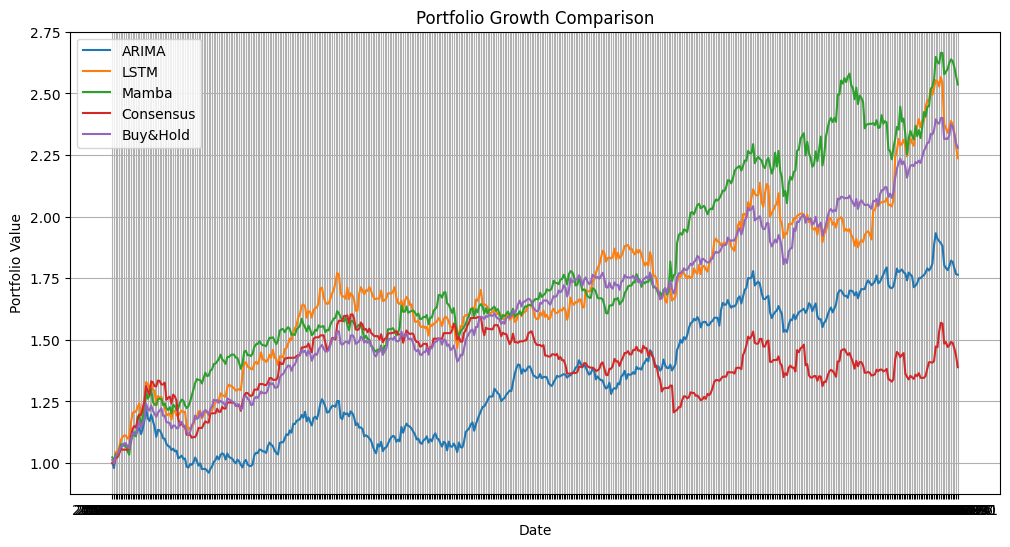

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for col in ["ARIMA", "LSTM", "Mamba", "Consensus","Buy&Hold"]:
    plt.plot(combined_df["Date"], combined_df[col], label=col)

plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.title("Portfolio Growth Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

def evaluate_prediction_accuracy(predictions_df, actual_simple_df):
    """
    Compute RMSE, MAE, and Hit Ratio for ARIMA, LSTM, Mamba predictions vs actual returns.
    Converts actual simple returns into log returns for a fair comparison.

    Parameters:
        predictions_df (pd.DataFrame): Predicted log returns for all models
        actual_simple_df (pd.DataFrame): Actual simple returns (aligned by Date)

    Returns:
        pd.DataFrame: RMSE, MAE, Hit Ratio for each model
    """

    # ✅ Align on Date
    merged = predictions_df[['Date']].merge(actual_simple_df, on='Date', how='inner')

    # ✅ Convert actual simple returns to log returns
    actual_values = merged.drop(columns=['Date']).values
    actual_log_values = np.log(1 + actual_values)  # log(1+r)

    metrics = []

    for model in ['ARIMA', 'LSTM', 'Mamba']:
        # ✅ Get predictions for this model
        model_cols = [col for col in predictions_df.columns if model in col]
        preds = predictions_df[model_cols].values

        # ✅ Flatten for overall evaluation
        preds_flat = preds.flatten()
        actual_flat = actual_log_values.flatten()

        # ✅ Compute metrics
        rmse = np.sqrt(mean_squared_error(actual_flat, preds_flat))
        mae = mean_absolute_error(actual_flat, preds_flat)

        # ✅ Hit Ratio
        correct_direction = ((preds_flat > 0) & (actual_flat > 0)) | ((preds_flat < 0) & (actual_flat < 0))
        hit_ratio = np.sum(correct_direction) / len(correct_direction)

        metrics.append({
            "Model": model,
            "RMSE": round(rmse, 6),
            "MAE": round(mae, 6),
            "Hit Ratio (%)": round(hit_ratio * 100, 2)
        })

    results_df = pd.DataFrame(metrics)
    return results_df

# ✅ Run evaluation
prediction_metrics = evaluate_prediction_accuracy(predictions_df, actual_df)
print(prediction_metrics)

   Model      RMSE       MAE  Hit Ratio (%)
0  ARIMA  0.020438  0.013629          49.96
1   LSTM  0.042526  0.031433          51.12
2  Mamba  0.734970  0.549584          50.10
